This is where we will implement and code everything....

NameError: name 'p_a_array' is not defined

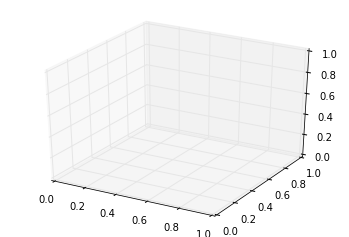

In [12]:
"""UNIFORM: Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step

"""
    
    
    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10



def uniform (pos, vel, m, total_time, time_steps , B, q):
    
    t = np.linspace(0, 10, time_steps)
    deltat= 10/time_steps
    
    x, y, z = pos
    vx, vy, vz = vel
    Bx, By, Bz = B
    
    px=m*vx #can say this because particle velcocity will be less than c
    py=m*vy
    pz=m*vz
    
    #position_and_velocity = () most liekly will be changed
    
    for i in t:
        #Bx=x* will be modified for non-uniform
        #By=y*
        #Bz=z*
        
        FBx=q*vx*Bx
        FBy=q*vy*By
        FBz=q*vz*Bz
        
        px = px + FBx * deltat 
        py = py + FBy * deltat 
        pz = pz + FBz * deltat
        
        vx=px/m
        vy=py/m
        vz=pz/m

        x=x+vx*(deltat)
        y=y+vy*(deltat)
        z=z+vz*(deltat)
        
        #r = np.sqrt(x**2 + y**2)
    
        #v = np.sqrt(vx**2 + vy**2 + vx**2)
        
        #ax = -q*vx*Bx/m*(x/r)
        #ay = -q*vy*By/m*(y/r)
        #az = -q*vz*Bz/m*(y/r) 
        
        #position_and_velocity = [x,y,z,ax,ay,az]   #i'm having some difficulty creating the list points, and velcoities 
        
    
        
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot(p_a_array[:,0], p_a_array[:,1], p_a_array[:,2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    plt.plot(t, p_a_array[:,0], label="X Fluctuations")
    plt.plot(t, p_a_array[:,1], label="Y Fluctuations")
    plt.legend()
    plt.show()


    energy = (1.0/2)*((p_a_array[:,3])**2 + (p_a_array[:,4])**2)

    plt.plot(t, energy)
    plt.show()
    
    return 
    
    

    
    
pos = [0, 1, 10]
vel = [1, 0, -1]
B = [0, 1, 0] 





uniform (pos = [0, 1, 10], vel= [1, 0, -1], m= 1 , total_time=10 , time_steps=101 , B = [0, 1, 0] , q=1)




In [57]:

"""

NONUNIFORM
Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step




    F=q*E + q*v*np.cross(B) 
    MEANS F = whatever + q* [v_x,v_y,v_z] x [B_x,B_y,B_z]
    
        for now we assume no E"""


   
      
    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10



def nonuniform (pos, vel, m, total_time, time_steps , B, q):
    
    t = np.linspace(0, 10, time_steps)
    deltat= 10/time_steps
    
    x, y, z = pos
    vx, vy, vz = vel
    Bx, By, Bz = B
    
    px=m*vx #can say this because particle velcocity will be less than c
    py=m*vy
    pz=m*vz
    
    #position_and_velocity = () most liekly will be changed
    
    for i in t:
        Bx=0
        By=cos(2*y)
        Bz=0
        
        FBx=q*vx*Bx
        FBy=q*vy*By
        FBz=q*vz*Bz
        
        px = px + FBx * deltat 
        py = py + FBy * deltat 
        pz = pz + FBz * deltat
        
        vx=px/m
        vy=py/m
        vz=pz/m

        x=x+vx*(deltat)
        y=y+vy*(deltat)
        z=z+vz*(deltat)
        
        #r = np.sqrt(x**2 + y**2)
    
        #v = np.sqrt(vx**2 + vy**2 + vx**2)
        
        #ax = -q*vx*Bx/m*(x/r)
        #ay = -q*vy*By/m*(y/r)
        #az = -q*vz*Bz/m*(y/r) 
        
        #position_and_velocity = [x,y,z,ax,ay,az]   #i'm having some difficulty creating the list points, and velcoities 
        
    
        
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot(p_a_array[:,0], p_a_array[:,1], p_a_array[:,2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    plt.plot(t, p_a_array[:,0], label="X Fluctuations")
    plt.plot(t, p_a_array[:,1], label="Y Fluctuations")
    plt.legend()
    plt.show()


    energy = (1.0/2)*((p_a_array[:,3])**2 + (p_a_array[:,4])**2)

    plt.plot(t, energy)
    plt.show()
    
    return 
    
    

    
    
pos = [0, 1, 10]
vel = [1, 0, -1]
B = [0, 1, 0] 





nonuniform (pos = [0, 1, 10], vel= [1, 0, -1], m= 1 , total_time=10 , time_steps=101 , B = [0, 1, 0] , q=1)




ValueError: setting an array element with a sequence.

In [65]:
"""Randomized"""
    
    
    
from scipy.integrate import odeint
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10



def random (pos, vel, m, total_time, time_steps , B, q):
    
    t = np.linspace(0, 10, time_steps)
    deltat= 10/time_steps
    
    x, y, z = pos
    vx, vy, vz = vel
    Bx, By, Bz = B
    
    px=m*vx #can say this because particle velcocity will be less than c
    py=m*vy
    pz=m*vz
    
    #position_and_velocity = () most liekly will be changed
    
    for i in t:
        Bx=0
        By=random.randrange(0,5) 
        Bz=0
        
        FBx=q*vx*Bx
        FBy=q*vy*By
        FBz=q*vz*Bz
        
        px = px + FBx * deltat 
        py = py + FBy * deltat 
        pz = pz + FBz * deltat
        
        vx=px/m
        vy=py/m
        vz=pz/m

        x=x+vx*(deltat)
        y=y+vy*(deltat)
        z=z+vz*(deltat)
        
        #r = np.sqrt(x**2 + y**2)
    
        #v = np.sqrt(vx**2 + vy**2 + vx**2)
        
        #ax = -q*vx*Bx/m*(x/r)
        #ay = -q*vy*By/m*(y/r)
        #az = -q*vz*Bz/m*(y/r) 
        
        #position_and_velocity = [x,y,z,ax,ay,az]   #i'm having some difficulty creating the list points, and velcoities 
        
    
        
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.plot(p_a_array[:,0], p_a_array[:,1], p_a_array[:,2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

    plt.plot(t, p_a_array[:,0], label="X Fluctuations")
    plt.plot(t, p_a_array[:,1], label="Y Fluctuations")
    plt.legend()
    plt.show()


    energy = (1.0/2)*((p_a_array[:,3])**2 + (p_a_array[:,4])**2)

    plt.plot(t, energy)
    plt.show()
    
    return 
    
    

    
    
pos = [0, 1, 10]
vel = [1, 0, -1]
B = [0, 1, 0] 





random (pos = [0, 1, 10], vel= [1, 0, -1], m= 1 , total_time=10 , time_steps=101 , B = [0, 1, 0] , q=1)




TypeError: return arrays must be of ArrayType